In [128]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
#https://github.com/wingchen/citipy
#When a Python file containing a script is imported to use in another Python script, the .py extension does not need to be added to the name of the file when using the import statement.

#python requests library (installed by going into data environment and importing requests. Checked version with requests.__version__)
#lets us request JSON data over the internet
import requests
#config is a text file in this folder with the api key. Importing it so that the key isn't out in the open
from config import weather_api_key 

#importing time from datetime library 
import time
#importing datetime module from datetime library 
from datetime import datetime

from scipy.stats import linregress

In [10]:
# creating latitude and longitude arrays

lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lats_lngs = zip(lats, lngs) #makes these two arrays pairs so that they'll stay together. The two values with the same indecies form a tuple.  
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

#you can only unzip a zipped tuple once, so unzip it into a list before moving on:
coordinates = list(lats_lngs)

In [87]:
# create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination.
for row in coordinates:
    new_city = citipy.nearest_city(row[0], row[1]).city_name
    if new_city not in cities: #only add city if it's not already in the list (unique)
        cities.append(new_city)
        
#print(cities)
len(cities) #shows how many cities (should get over 500, but if not then increase size in the previous cell) 
cities

['iqaluit',
 'cape town',
 'husavik',
 'punta arenas',
 'ushuaia',
 'kapaa',
 'thompson',
 'butaritari',
 'rikitea',
 'comodoro rivadavia',
 'arani',
 'east london',
 'muzhi',
 'bom jesus da lapa',
 'dikson',
 'lebu',
 'atuona',
 'san patricio',
 'illoqqortoormiut',
 'waddan',
 'barentsburg',
 'puerto ayora',
 'saskylakh',
 'victoria',
 'samusu',
 'yellowknife',
 'makakilo city',
 'yerbogachen',
 'christchurch',
 'moron',
 'san andres',
 'saint george',
 'timmins',
 'albany',
 'nikolskoye',
 'kuching',
 'alta floresta',
 'cravo norte',
 'mys shmidta',
 'margate',
 'bluff',
 'hamilton',
 'savonlinna',
 'gweta',
 'kodiak',
 'longyearbyen',
 'mataura',
 'umm lajj',
 'pavlohrad',
 'busselton',
 'georgetown',
 'balkanabat',
 'mnogovershinnyy',
 'hobyo',
 'ngukurr',
 'chokurdakh',
 'coihaique',
 'manuk mangkaw',
 'salalah',
 'moranbah',
 'arraial do cabo',
 'saldanha',
 'eldorado',
 'verkhnevilyuysk',
 'vao',
 'vaini',
 'inverell',
 'lagoa',
 'ponta delgada',
 'eureka',
 'qaanaaq',
 'san-ped

In [81]:
#testing out url with one city, boston (will probably change city to cities variable later)
city = "Boston" #(changed to cities variable below)

#url to get JSON data on city
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key + "&units=imperial" + "&q=" + city

#request.gets gets data from a web source. Then .json puts the values in a readable format
weather_request = requests.get(url)
weather_json = weather_request.json()

#200 is a valid response
#404 would happen if we tried to get weather data from an unrecognized city, or if the weather data for a city wasn't available
weather_request.status_code

#making sure the city can be found 
if weather_request.status_code == 200: 
    print(f"The weather request was found")
else:
    print(f"The weather request was not found")

#gets keys for JSON dictionary
weather_json.keys()

#looking at JSON values to see more about the key "main"
weather_json.get("main") #same as weather_json["sys"]

#get country the city is in 
weather_json["sys"]["country"]

#get date weather data was collected
weather_json['dt']

#########getting all the data needed in dataframe
#city
#country
country = weather_json["sys"]["country"]
#date
date = weather_json["dt"] 
#latitude
lat = weather_json["coord"]["lat"]
#longitude
lng = weather_json["coord"]["lon"]
#max temp
max_temp = weather_json["main"]["temp_max"]
#humidity
humidity = weather_json["main"]["humidity"]
#cloudiness
clouds = weather_json["clouds"]["all"]
#wind speed
wind = weather_json["wind"]["speed"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds. (imported datetime from datetime in first cell)
date = datetime.utcfromtimestamp(date) 

print(country, date, lat, lng, max_temp, humidity, clouds, wind)


The weather request was found
US 2022-06-04 04:25:01 42.3584 -71.0598 57.69 91 100 9.22


In [95]:
#empty list to hold weather data
city_data = []

#print beginning of logging
print("Beginning of retrieval    ")
print("----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all cities
for i, city in enumerate(cities): # this lets us have both index and value #range(len(cities)) gives just index, for city in cities gives just city:
    #go through cities 50 at a time for logging purposes
    if (i % 50 == 0 and i >= 50): # % is mod (gives remainder of division)
        set_count +=1
        record_count = 1 #WHY IS THIS HERE??????? WHY INITIALIZE HERE?
        time.sleep(60) #tells program to stop for 60 seconds because API only lets us have 60 calls per minute on the free version to prevent time out errors
    #new city url for each city
    city_url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key + "&units=imperial" + "&q=" + city.replace(" ","+") #some city names have spaces, so we're taking them out and concatinating the names for the URL (otherwise it will find data for just the first part of the city name)
    #This works if all cities are just one name, but the fix above is because the list has some cities with multiple names: Use cities[i] so that it doesn't reference just the index number since that's what we're using to go through the list (since we're using the range/length method)
    print (f"processing record {record_count} of set {set_count} | {city}")
    #add 1 to record count
    record_count +=1
#run API request on all the cities:
    try: #try and except need to be lowercase
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        #country
        city_country = city_weather["sys"]["country"]
        #latitude
        city_lat = city_weather["coord"]["lat"]
        #longitude
        city_lng = city_weather["coord"]["lon"]
        #max temp
        city_max_temp = city_weather["main"]["temp_max"]
        #humidity
        city_humidity = city_weather["main"]["humidity"]
        #cloudiness
        city_clouds = city_weather["clouds"]["all"]
        #wind speed
        city_wind = city_weather["wind"]["speed"]
        #convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"])
        #adding data to city data list:
        city_data.append({ #array of dictionaries
            "city":city.title(), #.title makes the first letter in each string capitalized
            "country":city_country,
            "latitude":city_lat,
            "longitude":city_lng,
            "max_temp":city_max_temp,
            "humidity":city_humidity,
            "clouds":city_clouds,
            "wind":city_wind,
            "date":city_date})
#if an error comes up, skip the city
    except:
        print("City not found. Skipping...")
        pass #tells it that if city is not found, don't add previous city's data #pass is a general purpose statement to handle all errors encountered and to allow the program to continue
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

len(city_data)
#we have 593 cities and their data    


Beginning of retrieval    
----------------------------
processing record 1 of set 1 | iqaluit
processing record 2 of set 1 | cape town
processing record 3 of set 1 | husavik
processing record 4 of set 1 | punta arenas
processing record 5 of set 1 | ushuaia
processing record 6 of set 1 | kapaa
processing record 7 of set 1 | thompson
processing record 8 of set 1 | butaritari
processing record 9 of set 1 | rikitea
processing record 10 of set 1 | comodoro rivadavia
processing record 11 of set 1 | arani
processing record 12 of set 1 | east london
processing record 13 of set 1 | muzhi
processing record 14 of set 1 | bom jesus da lapa
processing record 15 of set 1 | dikson
processing record 16 of set 1 | lebu
processing record 17 of set 1 | atuona
processing record 18 of set 1 | san patricio
processing record 19 of set 1 | illoqqortoormiut
City not found. Skipping...
processing record 20 of set 1 | waddan
processing record 21 of set 1 | barentsburg
City not found. Skipping...
processing reco

processing record 40 of set 4 | lorengau
processing record 41 of set 4 | attawapiskat
City not found. Skipping...
processing record 42 of set 4 | poso
processing record 43 of set 4 | tasiilaq
processing record 44 of set 4 | rio gallegos
processing record 45 of set 4 | storsteinnes
processing record 46 of set 4 | mandalgovi
processing record 47 of set 4 | nuuk
processing record 48 of set 4 | nguiu
City not found. Skipping...
processing record 49 of set 4 | provideniya
processing record 50 of set 4 | lalmohan
processing record 1 of set 5 | northam
processing record 2 of set 5 | taolanaro
City not found. Skipping...
processing record 3 of set 5 | deputatskiy
processing record 4 of set 5 | new norfolk
processing record 5 of set 5 | vardo
processing record 6 of set 5 | belushya guba
City not found. Skipping...
processing record 7 of set 5 | abong mbang
processing record 8 of set 5 | tiksi
processing record 9 of set 5 | bahir dar
processing record 10 of set 5 | virginia beach
processing reco

processing record 28 of set 8 | quelimane
processing record 29 of set 8 | raga
processing record 30 of set 8 | puri
processing record 31 of set 8 | bowen
processing record 32 of set 8 | shingu
processing record 33 of set 8 | hattiesburg
processing record 34 of set 8 | ankpa
processing record 35 of set 8 | saint-francois
processing record 36 of set 8 | araguaina
processing record 37 of set 8 | mae hong son
processing record 38 of set 8 | presidencia roque saenz pena
processing record 39 of set 8 | shenjiamen
processing record 40 of set 8 | zhangye
processing record 41 of set 8 | jasper
processing record 42 of set 8 | ilulissat
processing record 43 of set 8 | sovetskiy
processing record 44 of set 8 | yanchukan
City not found. Skipping...
processing record 45 of set 8 | cienaga de oro
processing record 46 of set 8 | hohhot
processing record 47 of set 8 | nisia floresta
processing record 48 of set 8 | sistranda
processing record 49 of set 8 | mpika
processing record 50 of set 8 | helong
pr

processing record 17 of set 12 | ginir
processing record 18 of set 12 | kralendijk
processing record 19 of set 12 | inirida
processing record 20 of set 12 | dingle
processing record 21 of set 12 | huarmey
processing record 22 of set 12 | yar-sale
processing record 23 of set 12 | haibowan
City not found. Skipping...
processing record 24 of set 12 | kununurra
processing record 25 of set 12 | tamandare
processing record 26 of set 12 | leo
processing record 27 of set 12 | prieska
processing record 28 of set 12 | sao joao de pirabas
processing record 29 of set 12 | huilong
processing record 30 of set 12 | hervey bay
processing record 31 of set 12 | tanabe
processing record 32 of set 12 | luvianos
processing record 33 of set 12 | kindia
processing record 34 of set 12 | khonuu
City not found. Skipping...
processing record 35 of set 12 | peer
processing record 36 of set 12 | wilmington
processing record 37 of set 12 | namtsy
processing record 38 of set 12 | san buenaventura
processing record 3

In [105]:
#putting array/list of dictionaries into a dataframe 
city_df = pd.DataFrame(city_data)

#reordering column order
city_df = city_df[["city", "country", "date", "latitude", "longitude", "max_temp", "humidity", "clouds", "wind"]]

city_df


#outputting a csv file:

file_to_export = "cities.csv"

city_df.to_csv(file_to_export, index_label="city_id") #index label is naming the 0-593 cities with a label on that index

In [175]:
#creating a scatterplot

lats = city_df["latitude"]
max_temps = city_df["max_temp"]
humidity = city_df["humidity"]
cloudiness = city_df["clouds"]
wind_speed = city_df["wind"]


############Putting time in title of graph
#practicing using time module
#imported time module above
today = time.time()
today #shows today's date in seconds since 1/1/1970
today = time.strftime("%x")
today #shows today's date as 06/04/2022 format

'06/05/22'

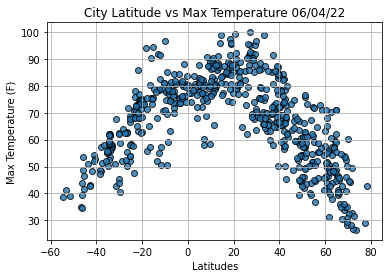

In [124]:
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs Max Temperature {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitudes")
plt.grid(True)

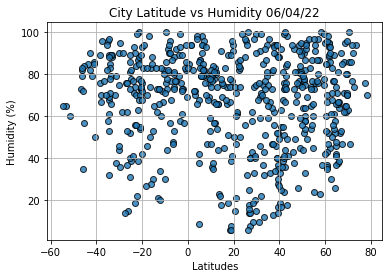

In [127]:
plt.scatter(lats, humidity,
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs Humidity {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitudes")
plt.grid(True)

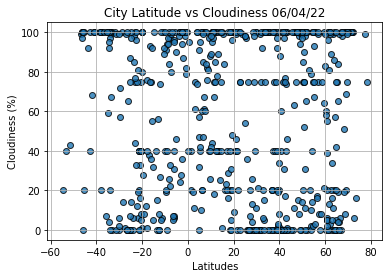

In [126]:
plt.scatter(lats, cloudiness,
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs Cloudiness {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitudes")
plt.grid(True)

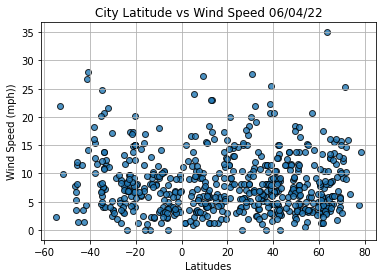

In [125]:
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs Wind Speed {today}")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitudes")
plt.grid(True)

y = -0.45x+92.94
The p-value is 0.011


Text(0, 0.5, 'Temp')

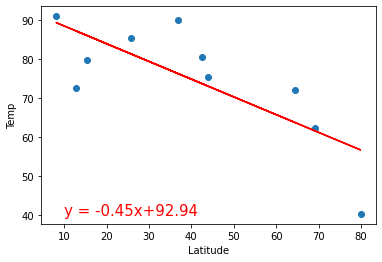

In [172]:
############REGRESSION PRACTICE
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

(slope, intercept, rvalue, pvalue, std_err)=linregress(lats, temps)
regression_tup = (slope, intercept, rvalue, pvalue, std_err)
regression_tup
regression_line = "y = "+str(round(slope,2))+"x+"+str(round(regression_tup[1],2))
print(regression_line)

print(f"The p-value is {pvalue:.3f}")

#calculating y values for x and intercept in equation using list comprehension
regression_values = [(x*slope + intercept) for x in lats] #go through list of lats, and calculate y for m*x+b. Add all these to the regression_values list (square bracket)
#make scatter plot
plt.scatter(lats, temps)
#graph regression line
plt.plot(lats,regression_values, color="r") #regression values are y values, and lats are x's 
#format regression line #first two things are writing regression line in bottom, second two are making font bigger and red
plt.annotate(regression_line, (10,40), fontsize=15, color="red") #10 and 40 are where the x and y axis starts 
plt.xlabel('Latitude')
plt.ylabel('Temp')
    

In [244]:
#creating dataframes for northern and southern hemispheres

#northern hemisphere is latitude (0 to 90), southern is latitude (0 to -90)
northern_hemi_df = city_df[(city_df["latitude"]>=0)] #inside () is assigning true to all lattitudes more than 0. Then do city df [] around it to get only true values in a list of a new dataframe
northern_hemi_df #405 northern, 188 southern
southern_hemi_df= city_df[city_df["latitude"]<0]
southern_hemi_df

#getting x and y values to put into function
northern_hemi_lat = northern_hemi_df["latitude"]
northern_hemi_temp = northern_hemi_df["max_temp"]
northern_hemi_temp


0      47.93
2      45.09
5      76.98
6      44.76
7      80.74
       ...  
588    80.13
589    81.79
590    45.90
591    45.03
592    57.88
Name: max_temp, Length: 405, dtype: float64

In [255]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.


def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates):
    #getting values for regression line
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
    #printing correlation coefficient and pvalue
    print(f"The correlation coefficient (r-value) is {rvalue:.3f}.")
    print(f"The p-value is {pvalue:.3f}.")
    #building regression line
    regress_line = "y= " + str(round(slope,2)) + "x+" + str(round(intercept,2))
    regress_line
    #getting regression line y values
    regress_values=[(slope*x + intercept) for x in x_values]
    #plot regression line
    plt.plot(x_values, regress_values, color="red")
    #plot scatterplot
    plt.scatter(x_values, y_values)
    #add regression line to bottom of plot
    plt.annotate(regress_line, (text_coordinates), fontsize=15, color = "r")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

#plotting max temp in northern hemisphere
plot_linear_regression(northern_hemi_df["latitude"], 
                       northern_hemi_df["max_temp"], 
                       'Linear Regression on the Northern Hemisphere \ 
                       for Maximum Temperature', 
                       "Maximum Temperature", 
                       (0,30))


#the correlation is very strong in this and the next plot, becaues the r-value is more than .7 and less than -.7 in the plots

SyntaxError: EOL while scanning string literal (2575800419.py, line 29)

The correlation coefficient (r-value) is 0.791.
The p-value is 0.000.


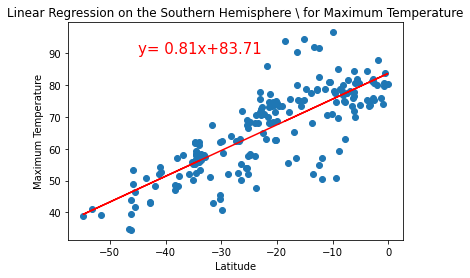

In [256]:
#plotting max temp in southern hemisphere
plot_linear_regression(southern_hemi_df["latitude"], 
                       southern_hemi_df["max_temp"], 
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 
                       "Maximum Temperature", 
                       (-45,90))